# Calculating simple 
- Pct change
- Log returns
- Standard deviation (Volatility)
- Rolling
    - Simple Moving Avarage
    - Exponential Moving Average
- Portfolio and return

### Standard deviation

- $\sigma_{p} = \sigma_{daily}\times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily}\times \sqrt{252}$
 
    *(252 trading days per year)*

In [311]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [312]:
tickers = ['BTC=F', 'BTC-CAD', 'BTC-USD', 'BTC-EUR']
start = dt.datetime(2021, 1, 4)
data = pdr.get_data_yahoo(tickers, start)

In [313]:
data.head()

Attributes Adj Close                                              Close  \
Symbols        BTC=F       BTC-CAD       BTC-USD       BTC-EUR    BTC=F   
Date                                                                      
2021-01-04   31550.0  40865.062500  31971.914062  26094.005859  31550.0   
2021-01-05   34515.0  43089.992188  33992.429688  27639.482422  34515.0   
2021-01-06   36565.0  46641.222656  36824.363281  29844.859375  36565.0   
2021-01-07   39625.0  49945.906250  39371.042969  32089.447266  39625.0   
2021-01-08   39520.0  51769.027344  40797.609375  33372.281250  39520.0   

Attributes                                               High                \
Symbols          BTC-CAD       BTC-USD       BTC-EUR    BTC=F       BTC-CAD   
Date                                                                          
2021-01-04  40865.062500  31971.914062  26094.005859  34170.0  42467.906250   
2021-01-05  43089.992188  33992.429688  27639.482422  34680.0  43642.414062   
2021-01-06  46641.222656  36824.363281  29844.859375  37035.0  46711.308594   
2021-01-07  49945.906250  39371.042969  32089.447266  41000.0  51054.824219   
2021-01-08  51769.027344  40797.609375  33372.281250  42730.0  53271.730469   

Attributes  ...           Low                   Open                \
Symbols     ...       BTC-USD       BTC-EUR    BTC=F       BTC-CAD   
Date        ...                                                      
2021-01-04  ...  28722.755859  23363.980469  33405.0  41747.992188   
2021-01-05  ...  30221.187500  24633.167969  31655.0  40871.613281   
2021-01-06  ...  33514.035156  27254.718750  34655.0  43116.847656   
2021-01-07  ...  36491.191406  29653.542969  36445.0  46653.269531   
2021-01-08  ...  36838.636719  30048.318359  40275.0  49959.511719   

Attributes                               Volume                              \
Symbols          BTC-USD       BTC-EUR    BTC=F       BTC-CAD       BTC-USD   
Date                                                                          
2021-01-04  32810.949219  26784.332031  14997.0  1.037395e+11  8.116348e+10   
2021-01-05  31977.041016  26098.189453   8153.0  8.562535e+10  6.754732e+10   
2021-01-06  34013.613281  27656.708984  19469.0  9.536054e+10  7.528943e+10   
2021-01-07  36833.875000  29852.566406  16834.0  1.075288e+11  8.476214e+10   
2021-01-08  39381.765625  32098.187500  15379.0  1.118017e+11  8.810752e+10   

Attributes                
Symbols          BTC-EUR  
Date                      
2021-01-04  6.624190e+10  
2021-01-05  5.492320e+10  
2021-01-06  6.101945e+10  
2021-01-07  6.908555e+10  
2021-01-08  7.207160e+10  

[5 rows x 24 columns]

### Bitcoin 

In [314]:
data = data['Adj Close']

In [315]:
data

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250
...,...,...,...,...
2022-07-13,19615.0,26275.634766,20212.074219,20142.341797
2022-07-14,20625.0,26963.441406,20569.919922,20515.224609
2022-07-15,20955.0,27155.154297,20836.328125,20669.638672


In [316]:
data['%-chg'] = data['BTC-CAD'].pct_change()

In [317]:
data['%-chg']

Date
2021-01-04         NaN
2021-01-05    0.054446
2021-01-06    0.082414
2021-01-07    0.070853
2021-01-08    0.036502
                ...   
2022-07-13    0.043314
2022-07-14    0.026177
2022-07-15    0.007110
2022-07-16    0.016989
2022-07-17   -0.002502
Name: %-chg, Length: 560, dtype: float64

In [318]:
data.head()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg
Date,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502


In [320]:
import numpy as np

In [321]:
data['Log returns'] = np.log(data['BTC-CAD']/data['BTC-CAD'].shift())

In [322]:
data['BTC-CAD']/data['BTC-CAD'].shift()

Date
2021-01-04         NaN
2021-01-05    1.054446
2021-01-06    1.082414
2021-01-07    1.070853
2021-01-08    1.036502
                ...   
2022-07-13    1.043314
2022-07-14    1.026177
2022-07-15    1.007110
2022-07-16    1.016989
2022-07-17    0.997498
Name: BTC-CAD, Length: 560, dtype: float64

In [323]:
data.head()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns
Date,,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN,NaN
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446,0.053015
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414,0.079194
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853,0.068456
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502,0.035851


In [324]:
data['Log returns'].std()

0.03936714107254068

#### Annual volatility  $ \sqrt{252}$

In [325]:
volatility = data['Log returns'].std()*252**.5

In [326]:
volatility

0.6249339906332353

In [327]:
l = round(volatility, 4)*100

In [328]:
l

62.49

In [329]:
type(l)

numpy.float64

In [330]:
str_vol = str(round(volatility, 4)*100)

In [331]:
type(str_vol)

str

In [332]:
str_vol

'62.49'

<IPython.core.display.Javascript object>


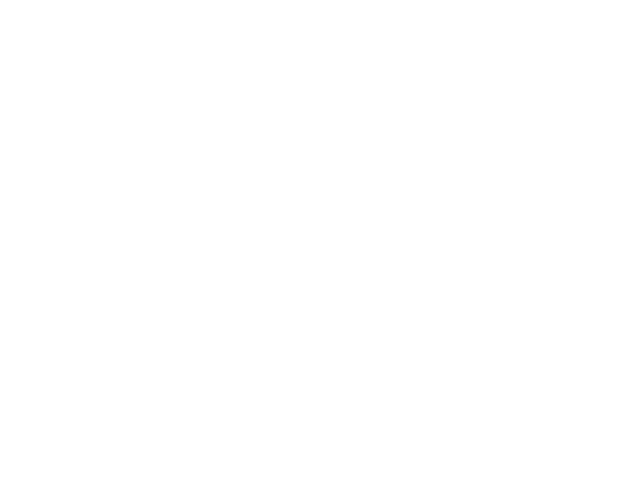

Text(0.5, 1.0, 'BTC-CAD: 62.49%')

In [333]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("BTC-CAD: " + str_vol + "%")

In [338]:
data.head()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN,NaN,NaN,40865.062500
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446,0.053015,NaN,41269.595170
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414,0.079194,NaN,42246.254713
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853,0.068456,NaN,43646.191356
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502,0.035851,NaN,45123.070627


In [339]:
data['MA10'] = data['BTC-CAD'].rolling(10).mean()

In [340]:
data.tail()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,
2022-07-13,19615.0,26275.634766,20212.074219,20142.341797,0.043314,0.042402,26765.554883,26464.828590
2022-07-14,20625.0,26963.441406,20569.919922,20515.224609,0.026177,0.025840,26860.369141,26555.485465
2022-07-15,20955.0,27155.154297,20836.328125,20669.638672,0.007110,0.007085,26944.393945,26664.516162
2022-07-16,NaN,27616.490234,21190.316406,21020.792969,0.016989,0.016846,27026.923633,26837.602357
2022-07-17,NaN,27547.386719,21137.291016,20968.193359,-0.002502,-0.002505,26975.678320,26966.654059


In [341]:
data['EMA10'] = data['BTC-CAD'].ewm(span=10, adjust=False).mean()

In [342]:
data.tail()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,
2022-07-13,19615.0,26275.634766,20212.074219,20142.341797,0.043314,0.042402,26765.554883,26464.828590
2022-07-14,20625.0,26963.441406,20569.919922,20515.224609,0.026177,0.025840,26860.369141,26555.485465
2022-07-15,20955.0,27155.154297,20836.328125,20669.638672,0.007110,0.007085,26944.393945,26664.516162
2022-07-16,NaN,27616.490234,21190.316406,21020.792969,0.016989,0.016846,27026.923633,26837.602357
2022-07-17,NaN,27547.386719,21137.291016,20968.193359,-0.002502,-0.002505,26975.678320,26966.654059


<IPython.core.display.Javascript object>


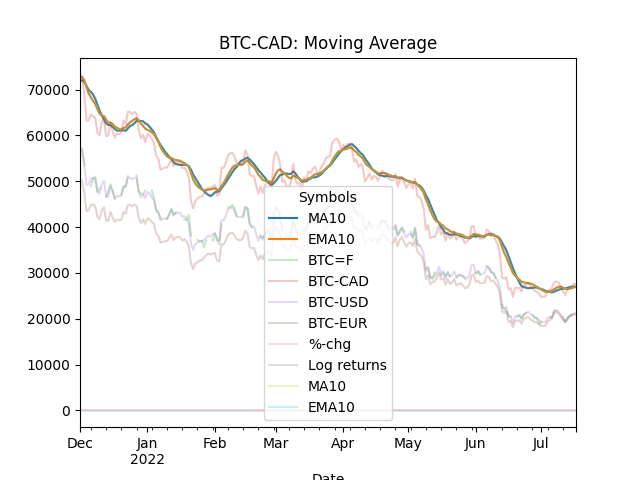

Text(0.5, 1.0, 'BTC-CAD: Moving Average')

In [343]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2021-12-01':].plot(ax=ax)
data.loc['2021-12-01':].plot(ax=ax, alpha=0.25)
ax.set_title("BTC-CAD: Moving Average")

In [396]:
portfolios = [.25, .25, .25, .25]

In [397]:
np.sum(portfolios)

1.0

In [398]:
data/data.iloc[0]

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.093978,1.054446,1.063197,1.059227
2021-01-06,1.158954,1.141347,1.151772,1.143744
2021-01-07,1.255943,1.222215,1.231426,1.229763
2021-01-08,1.252615,1.266829,1.276045,1.278925
...,...,...,...,...
2022-07-13,0.621712,0.642985,0.632182,0.771915
2022-07-14,0.653724,0.659816,0.643375,0.786204
2022-07-15,0.664184,0.664508,0.651707,0.792122


In [399]:
df = pd.DataFrame(data)

In [400]:
df

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250
...,...,...,...,...
2022-07-13,19615.0,26275.634766,20212.074219,20142.341797
2022-07-14,20625.0,26963.441406,20569.919922,20515.224609
2022-07-15,20955.0,27155.154297,20836.328125,20669.638672


In [401]:
data = df.drop(['%-chg','Log returns','MA10','EMA10'], axis=1)

KeyError: "['%-chg' 'Log returns' 'MA10' 'EMA10'] not found in axis"

In [402]:
data

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250
...,...,...,...,...
2022-07-13,19615.0,26275.634766,20212.074219,20142.341797
2022-07-14,20625.0,26963.441406,20569.919922,20515.224609
2022-07-15,20955.0,27155.154297,20836.328125,20669.638672


### Return of 100,000 on a Bitcoin portfolio  

In [403]:
(data/data.iloc[0])*portfolios*100000

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,25000.000000,25000.000000,25000.000000,25000.000000
2021-01-05,27349.445325,26361.144185,26579.914500,26480.681589
2021-01-06,28973.851030,28533.678773,28794.306160,28593.596874
2021-01-07,31398.573693,30555.383495,30785.647437,30744.079156
2021-01-08,31315.372425,31670.713427,31901.131486,31973.129605
...,...,...,...,...
2022-07-13,15542.789223,16074.632680,15804.554412,19297.862798
2022-07-14,16343.106181,16495.411824,16084.366955,19655.112289
2022-07-15,16604.595880,16612.695929,16292.681198,19803.052455


In [404]:
portfolios

[0.25, 0.25, 0.25, 0.25]

In [405]:
portfoliod = np.sum((data/data.iloc[0])*portfolios*100000, axis=1)
portfoliod

Date
2021-01-04    100000.000000
2021-01-05    106771.185599
2021-01-06    114895.432837
2021-01-07    123483.683781
2021-01-08    126860.346942
                  ...      
2022-07-13     66719.839114
2022-07-14     68577.997249
2022-07-15     69313.025462
2022-07-16     53603.889092
2022-07-17     53469.756848
Length: 560, dtype: float64

In [406]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.04353217, 0.03504578, 0.67328908, 0.24813297])

In [407]:
weight.sum()

1.0

In [408]:
weighted = np.sum((data/data.iloc[0])*weight*100000, axis=1)
weighted

Date
2021-01-04    100000.000000
2021-01-05    106324.495650
2021-01-06    114972.742627
2021-01-07    123175.780824
2021-01-08    127541.688207
                  ...      
2022-07-13     66677.717192
2022-07-14     67984.221882
2022-07-15     68754.054142
2022-07-16     66981.657084
2022-07-17     66814.047860
Length: 560, dtype: float64

In [416]:
a=portfoliod.iloc[-3]
a

69313.02546186994

In [417]:
b=weighted.iloc[-3]
b

68754.05414177629

In [418]:
c=a-b
c

558.971320093653

In [419]:
c/a

0.00806444844051932

### Conclusion

In this scenario an equal portfolio distribution among the four bitcoin shares yields a loss of 0.8% compared to a random distribution where almost 70% is put down on BIT-USD